In [25]:
#Navie bayes:---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
dataset=pd.read_csv('Social_Network_Ads.csv')

In [27]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [28]:
X=dataset.iloc[:,[2,3]].values

In [29]:
y=dataset.iloc[:,4].values

In [30]:
from sklearn.cross_validation import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc_x=StandardScaler()

In [34]:
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.fit_transform(X_test)

C:\Users\shivam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
classifier=GaussianNB()

In [37]:
classifier.fit(X_train,y_train)

GaussianNB(priors=None)

In [38]:
y_pred=classifier.predict(X_test)

In [39]:
classifier.score(X_test,y_test)

0.91000000000000003

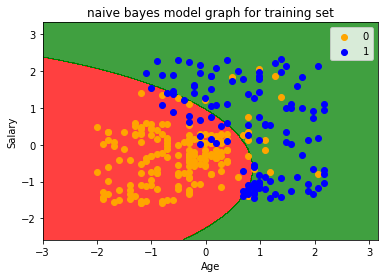

In [40]:
#visualization:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c=ListedColormap(('orange','blue'))(i),label=j)
plt.title('naive bayes model graph for training set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

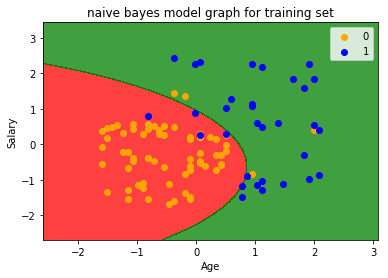

In [41]:
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c=ListedColormap(('orange','blue'))(i),label=j)
plt.title('naive bayes model graph for training set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

In [42]:
#confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
cm=confusion_matrix(y_test,y_pred)

In [45]:
cm

array([[64,  4],
       [ 5, 27]], dtype=int64)